In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/braintumortrain",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")

Found 2877 images belonging to 4 classes.


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg16.layers:
  layer.trainable = False

In [6]:
from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [7]:
prediction = layers.Dense(units=4,activation="softmax")(x)
model = tf.keras.models.Model(inputs = vgg16.input,outputs=prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
import tensorflow as tf

# Define the optimizer with weight decay
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=1e-6)

# Compile your model with this optimizer
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

result = model.fit(train_data, epochs = 20, steps_per_epoch=len(train_data))

Epoch 1/20
90/90 [==============================] - 47s 520ms/step - loss: 0.3979 - accuracy: 0.8373
Epoch 2/20
90/90 [==============================] - 50s 551ms/step - loss: 0.3817 - accuracy: 0.8530
Epoch 3/20
90/90 [==============================] - 47s 523ms/step - loss: 0.3515 - accuracy: 0.8620
Epoch 4/20
90/90 [==============================] - 47s 520ms/step - loss: 0.3629 - accuracy: 0.8523
Epoch 5/20
90/90 [==============================] - 47s 526ms/step - loss: 0.3575 - accuracy: 0.8589
Epoch 6/20
90/90 [==============================] - 49s 541ms/step - loss: 0.3521 - accuracy: 0.8575
Epoch 7/20
90/90 [==============================] - 49s 540ms/step - loss: 0.3496 - accuracy: 0.8603
Epoch 8/20
90/90 [==============================] - 49s 543ms/step - loss: 0.3367 - accuracy: 0.8669
Epoch 9/20
90/90 [==============================] - 54s 590ms/step - loss: 0.3529 - accuracy: 0.8665
Epoch 10/20
90/90 [==============================] - 49s 547ms/step - loss: 0.3082 - accura

In [15]:
from tensorflow.keras.preprocessing import image
output_class = ["glioma_tumor","meningioma_tumor","no_tumor","pitutary_tumor"]
def braintumor_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()

  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Brain Tumor name is ", predicted_value, " with ", predicted_accuracy, " % accuracy")

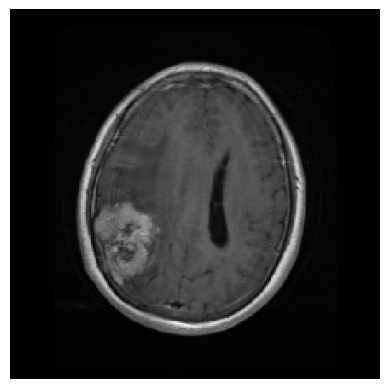

1/1 [==============================] - 0s 161ms/step
Brain Tumor name is  meningioma_tumor  with  99.46  % accuracy


In [16]:
braintumor_prediction("/content/drive/MyDrive/Colab Notebooks/braintumortrain/meningioma_tumor/m (109).jpg")

In [17]:
model.save("/content/drive/MyDrive/braintumor_prediction.keras")